In [1]:
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_valve_features = pd.read_csv("Features/df_valve_feature.csv")
df_valve_features.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.660165,0.922338,0.798671,0.078371,0.000003,0.001000,0.000115,0.000134,-492.366608,37.447746,...,0.006315,0.003352,0.001595,0.003029,0.001864,0.000257,0.104004,0.313965,0.230870,0.020863
1,0.718589,0.852937,0.794732,0.051290,0.000002,0.008787,0.000571,0.001136,-496.216064,121.291771,...,0.006987,0.003938,0.001909,0.003378,0.002389,0.000272,0.036133,0.183594,0.070559,0.022225
2,0.550722,0.939885,0.686352,0.116051,0.000001,0.003222,0.000277,0.000459,-509.113831,99.657051,...,0.007130,0.004454,0.001646,0.003602,0.002354,0.000383,0.049316,0.200195,0.101711,0.020420
3,0.721091,0.932356,0.793144,0.063125,0.000003,0.001686,0.000204,0.000251,-476.469635,60.138268,...,0.006569,0.003802,0.001673,0.003126,0.001987,0.000249,0.118652,0.256348,0.195603,0.021476
4,0.653515,0.953053,0.746861,0.096253,0.000002,0.009565,0.000528,0.001082,-485.858185,115.613365,...,0.007554,0.004449,0.002028,0.003482,0.002440,0.000255,0.034180,0.183105,0.081498,0.025460


In [3]:
df_valve_target = pd.read_csv("Features/df_valve_target.csv")
df_valve_target.tail()

,0
12505,1
12506,1
12507,1
12508,1
12509,1


In [4]:
X = df_valve_features
y = df_valve_target.values.ravel()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=69
)

In [6]:
from sklearn.ensemble import RandomForestClassifier
####### Default Random Forest ########
model = RandomForestClassifier(
    random_state=69
)

model.fit(X_train, y_train)

print(f'Default Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Default Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%\n')


########## Tuned Random Forest #######
model = RandomForestClassifier(
    n_estimators = 500, 
    criterion ='entropy',
    warm_start = True,
    max_features = 'sqrt',
    oob_score = 'True', # more on this below
    random_state=69  
) 

model.fit(X_train, y_train)

print(f'Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

Default Random Forest Model's accuracy on training set is 100.00%
Default Random Forest Model's accuracy on test set is 94.92%

Random Forest Model's accuracy on training set is 100.00%
Random Forest Model's accuracy on test set is 94.96%


In [7]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.59      0.73       283
           1       0.95      1.00      0.97      2219

    accuracy                           0.95      2502
   macro avg       0.94      0.79      0.85      2502
weighted avg       0.95      0.95      0.94      2502



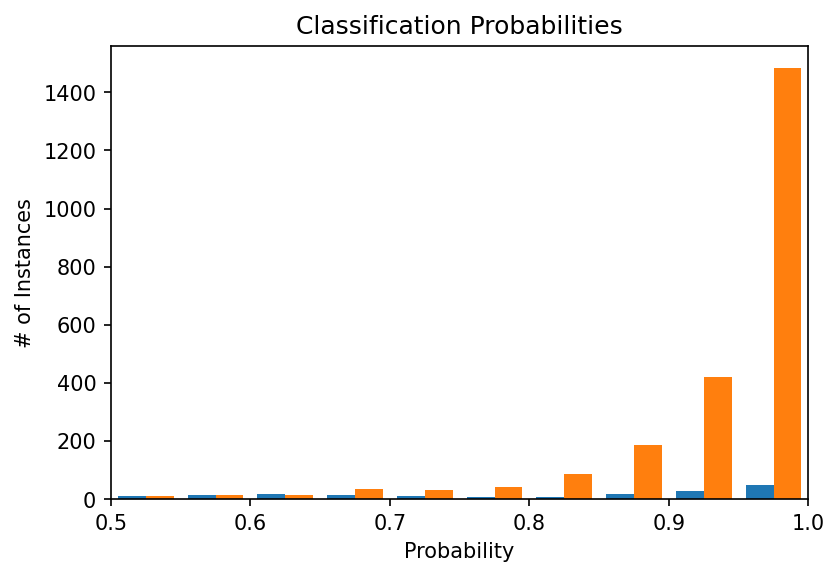

In [9]:
# predict probabilities
probas = model.predict_proba(X_test)

# plot
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.show()

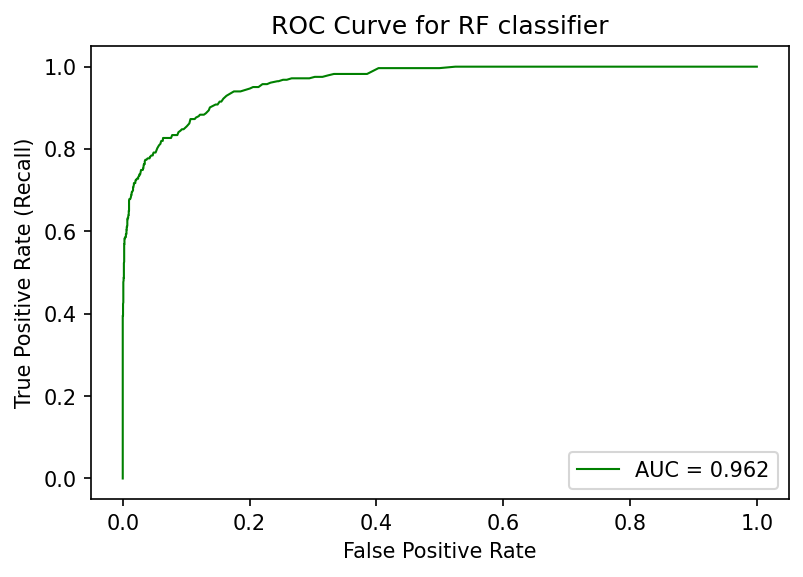

In [10]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

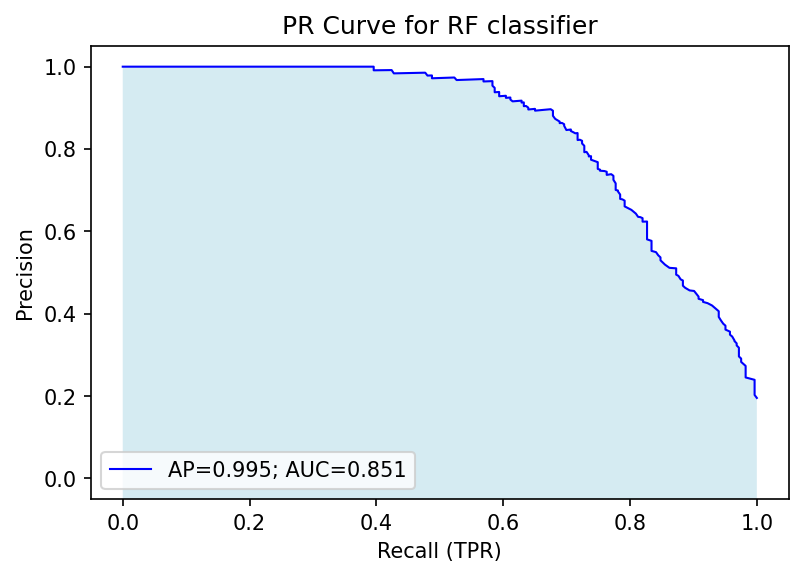

In [11]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
# get precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, probas[:,0], pos_label=0)
# average precision score
avg_precision = average_precision_score(y_test, probas[:,1])
# precision auc
pr_auc = auc(recall, precision)
# plot
plt.figure(dpi=150)
plt.plot(recall, precision, lw=1, color='blue', label=f'AP={avg_precision:.3f}; AUC={pr_auc:.3f}')
plt.fill_between(recall, precision, -1, facecolor='lightblue', alpha=0.5)
plt.title('PR Curve for RF classifier')
plt.xlabel('Recall (TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()